In [4]:
import numpy as np
import pandas as pd

In [5]:
players = pd.read_csv('Players.csv')
stats = pd.read_csv('Seasons_Stats.csv')

In [6]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [8]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [10]:
players.dropna(subset=['Player'], how='all', inplace = True)
stats.dropna(subset=['Player'], how='all', inplace = True)
try:
    del stats['blanl']
    del stats['blank2']
except:
    print('уже удалено')

In [11]:
print(players.shape, stats.shape)

(3921, 8) (24624, 51)


In [14]:
def nul_deletion(data, coef):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        if temp_null_count>data[col].shape[0]*coef:
            del data[col]
        else:
            if data[col].dtype != 'O':
                data[col]=data[col].fillna(data[col].median())
    data.fillna(method='bfill', inplace =True)
    data.fillna(method='ffill', inplace =True)

In [15]:
nul_deletion(players, 0.3)
nul_deletion(stats, 0.3)

In [16]:
print(players.shape, stats.shape)

(3921, 8) (24624, 50)


In [19]:
players.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)
stats.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)

In [20]:
def first(data):
    return data.iloc[0]

In [21]:
first_keys=['Player_id','Year', 'Age', 'Player', 'Pos', 'Tm']
col_agg_d= {}
col_agg_d.update(dict.fromkeys(first_keys, first))
col_agg_d.update(dict.fromkeys(stats.columns[6:], np.mean))
stats=stats.groupby(['Player']).agg(col_agg_d).sort_values(('Player_id'), ascending=True)
stats = stats.reset_index(drop=True)
for i in range(stats.shape[0]):
    stats.at[i, 'Player_id'] = i
stats.head()

,Player_id,Year,Age,Player,Pos,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,31.0,Curly Armstrong,G-F,FTW,50.500000,8.0,1053.000000,12.700000,...,0.674500,38.0,106.0,124.000000,126.5,29.0,11.0,55.0,157.000000,330.000000
1,1,1950.0,29.0,Cliff Barker,SG,INO,49.666667,8.0,866.666667,12.066667,...,0.648333,38.0,106.0,113.333333,98.0,29.0,11.0,55.0,84.333333,185.666667
2,2,1950.0,25.0,Leo Barnhorst,SF,CHS,68.800000,8.0,1877.000000,14.000000,...,0.676800,38.0,106.0,333.000000,223.2,29.0,11.0,55.0,206.600000,646.400000
3,3,1950.0,24.0,Ed Bartels,F,TOT,11.750000,8.0,1053.000000,12.700000,...,0.574000,38.0,106.0,140.250000,13.0,29.0,11.0,55.0,28.000000,49.500000
4,4,1950.0,22.0,Ralph Beard,G,INO,63.000000,8.0,1053.000000,12.700000,...,0.768500,38.0,106.0,205.000000,275.5,29.0,11.0,55.0,114.000000,1003.000000


In [22]:
players_with_stats = pd.merge(players, stats, left_on='Player_id', right_on='Player_id', how='inner')
players_with_stats.rename(columns={'Player_x': 'Player'}, inplace=True)
try:
    del players_with_stats['Player_y']
except:
    pass

Player_id        int64
Player          object
height         float64
weight         float64
collage         object
born           float64
birth_city      object
birth_state     object
Year           float64
Age            float64
Pos             object
Tm              object
G              float64
GS             float64
MP             float64
PER            float64
TS%            float64
3PAr           float64
FTr            float64
ORB%           float64
DRB%           float64
TRB%           float64
AST%           float64
STL%           float64
BLK%           float64
TOV%           float64
USG%           float64
OWS            float64
DWS            float64
WS             float64
WS/48          float64
OBPM           float64
DBPM           float64
BPM            float64
VORP           float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
2P             float64
2PA            float64
2P%            float64
eFG%       

In [24]:
try:
    del players_with_stats['Player_id']
    del players_with_stats['Player']
except:
    pass
players_with_stats.shape

(3920, 54)

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
cat_col=['birth_city', 'birth_state', 'Pos', 'Tm', 'collage'] 

In [33]:
ohe = OneHotEncoder()
pws_ohe = ohe.fit_transform(players_with_stats[cat_col])
pws_ohe = pd.DataFrame(pws_ohe.toarray())
pws = pd.concat([players_with_stats, pws_ohe], axis=1)
print(pws_ohe.shape, pws.shape)

(3920, 1902) (3920, 1956)


In [34]:
pws.head()

,height,weight,collage,born,birth_city,birth_state,Year,Age,Pos,Tm,...,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901
0,180.0,77.0,Indiana University,1918.0,Yorktown,Indiana,1950.0,31.0,G-F,FTW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,29.0,SG,INO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,193.0,86.0,University of Notre Dame,1924.0,Hardinsburg,Kentucky,1950.0,25.0,SF,CHS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,196.0,88.0,North Carolina State University,1925.0,Hardinsburg,Kentucky,1950.0,24.0,F,TOT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,22.0,G,INO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
try:
    for col in cat_col:
        del pws[col]
except:
    pass
pws.shape

(3920, 1951)

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
%matplotlib inline 

In [38]:
norm = Normalizer()
pws_norm = norm.fit_transform(pws)

<function matplotlib.pyplot.show(*args, **kw)>

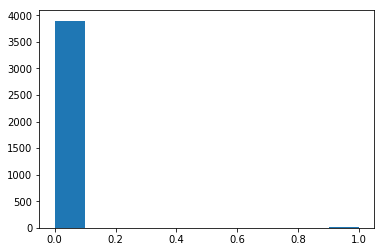

In [55]:
plt.hist(pws.values[:, 1900])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

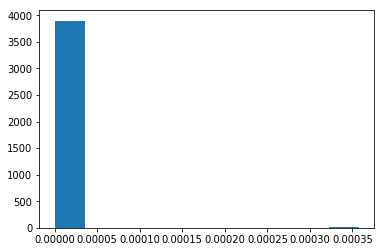

In [56]:
plt.hist(pws_norm[:, 1900])
plt.show